# EE16A Homework 3 


## Question 2: Image Compression

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
from scipy import ndimage as nd
from scipy import misc
from scipy import io
from matplotlib import path

### Part b)

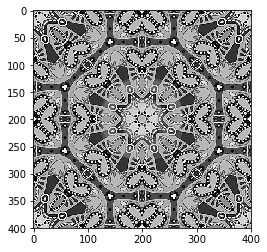

In [4]:
#Load Pattern Image
pattern = np.load('pattern.npy')
plt.imshow(pattern, cmap='gray', interpolation='nearest')

Use the command [shape](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) to find the dimensions of the image. How many eigenvalues do you expect? 

Run the code below to find the eigenvector and eigenvalues of ``pattern`` and sort them in descending order (first eigenvalue/vector corresponds to the largest eigenvalue)

In [5]:
eig_vals, eig_vectors = np.linalg.eig(pattern)
idx = (abs(eig_vals).argsort())
idx = idx[::-1]
eig_vals = eig_vals[idx]
eig_vectors = eig_vectors[:,idx]
A = np.zeros((400,400))
for i in  range(len(eig_vals)):
    A[i, i] = eig_vals[i]
V = eig_vectors

In [6]:
shape(pattern)

(400, 400)

In [7]:
print(A)

[[  5.17977812e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   8.34455214e+03   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -6.53777196e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.25439907e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    5.73743124e-01   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   5.28745994e-01]]


In [8]:
print(V)

[[ 0.05272712  0.00485203  0.03648574 ...,  0.08319636  0.06586539
  -0.00419731]
 [ 0.05362817  0.05090675  0.0096022  ..., -0.0413083  -0.02076564
   0.1048611 ]
 [ 0.04938267  0.05893814 -0.05341189 ..., -0.02096135 -0.12229795
   0.12034818]
 ..., 
 [ 0.04947531  0.06231956 -0.04602839 ...,  0.01555162  0.14062768
  -0.1194096 ]
 [ 0.05423878  0.0479798   0.01289808 ...,  0.03292486 -0.00820568
  -0.09842246]
 [ 0.0523673   0.00151874  0.03694918 ..., -0.07124379 -0.04447344
   0.01607259]]


In [9]:
print(0 in eig_vals)

False


### Part c)

Find the pattern approximation using 100 largest eigenvalues/eigenvectors.

* Index into above variables to choose the first 100 eigenvalues and eigenvectors.
* You can use the command [np.outer](http://docs.scipy.org/doc/numpy/reference/generated/numpy.outer.html) to find the outer product of two vectors

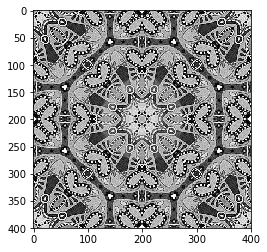

In [10]:
rank = 100
S = np.zeros(pattern.shape)
for i in range(rank):
    vec_i = eig_vectors[:,i]  # i-th largest eigenvector
    val_i = eig_vals[i]       # i-th largest eigenvalue
    S += val_i * np.outer(vec_i, vec_i)  # Your Code Here
    
plt.imshow(S, cmap='gray', vmin=0, vmax=255)

### Part d)
Find the pattern approximation using 50 largest eigenvalues/eigenvectors.


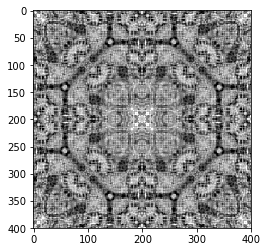

In [16]:
rank = 12

S = np.zeros(pattern.shape)
for i in range(rank):
    vec_i = eig_vectors[:,i]  # i-th largest eigenvector
    val_i = eig_vals[i]       # i-th largest eigenvalue
    S += val_i * np.outer(vec_i, vec_i)# Your Code Here
    
plt.imshow(S, cmap='gray', vmin=0, vmax=255)

## Question 3: Sports Rank

In this part, we will implement the power iteration method to find the dominant eigenvector of a matrix. For the matrix in consideration the dominant eigenvector will correspond to a ranking of the top 25 teams in College football for the 2014 regular season.



First we load the wins of all the teams into a matrix

In [12]:
# Creating W (win) Matrix
W=np.zeros([26,26])

# Alabama
count=0
W[count,[7,15,18,21]]=1
W[count,25]=8.0
Teams={count:'ALA'}
count=count+1

# FSU
Teams.update({count:'FSU'})
W[1,[9,17,19]]=1
W[1,25]=10.0
count=count+1

# Oregon
Teams.update({count:'ORE'})
W[2,[6,11,13,22]]=1
W[2,25]=8.0
count=count+1

# Baylor
Teams.update({count:'BAY'})
W[3,[5,10]]=1
W[3,25]=9.0
count=count+1

# OSU
Teams.update({count:'OSU'})
W[4,[6,16]]=1
W[4,25]=10.0
count=count+1

# TCU
Teams.update({count:'TCU'})
W[5,[10]]=1
W[5,25]=10.0
count=count+1

# MSU
Teams.update({count:'MSU'})
W[6,[24]]=1
W[6,25]=9.0
count=count+1

# MSST
Teams.update({count:'MSST'})
W[7,[18,21]]=1
W[7,25]=8.0
count=count+1

# MISS
Teams.update({count:'MISS'})
W[8,[0,7,20]]=1
W[8,25]=6.0
count=count+1

# GT
Teams.update({count:'GT'})
W[9,[17,12]]=1
W[9,25]=8.0
count=count+1

# KSU
Teams.update({count:'KSU'})
W[count,25]=9.0
count=count+1

# ARIZ
Teams.update({count:'ARIZ'})
W[count,[2,22,14]]=1
W[count,25]=7.0
count=count+1

# UGA
Teams.update({count:'UGA'})
W[count,[17,15,18]]=1
W[count,25]=6.0
count=count+1

# UCLA
Teams.update({count:'UCLA'})
W[count,[14,11,23]]=1
W[count,25]=6.0
count=count+1

# ASU
Teams.update({count:'ASU'})
W[count,[23,22]]=1
W[count,25]=7.0
count=count+1

# MIZZ
Teams.update({count:'MIZZ'})
W[count,25]=10.0
count=count+1

# WISC
Teams.update({count:'WISC'})
W[count,[24]]=1
W[count,25]=9.0
count=count+1

# CLEM
Teams.update({count:'CLEM'})
W[count,[19]]=1
W[count,25]=8.0
count=count+1

# AUB
Teams.update({count:'AUB'})
W[count,[10,8,21]]=1
W[count,25]=5.0
count=count+1

# LOU
Teams.update({count:'LOU'})
W[count,25]=9.0
count=count+1

# BSU
Teams.update({count:'BSU'})
W[count,25]=11.0
count=count+1

# LSU
Teams.update({count:'LSU'})
W[count,[16,8]]=1
W[count,25]=6.0
count=count+1

# UTAH
Teams.update({count:'UTAH'})
W[count,[13,23]]=1
W[count,25]=6.0
count=count+1


# USC
Teams.update({count:'USC'})
W[count,[11]]=1
W[count,25]=7.0
count=count+1

# NEB
Teams.update({count:'NEB'})
W[count,25]=9.0
count=count+1

# OTHERS
Teams.update({count:'Others'})
W[count,[3,4,8,13,14,15,16,18,19,20,21,22,23,24]]=1
W[count,[9,12]]=2

In [13]:
# Creating Q matrix (accounts for normalization by games played)

numrows,numcols=W.shape
Q=np.zeros([numrows,numcols])

for j in range(0,numrows):
    Q[j,:]=W[j,:]/(np.sum(W[:,j])+np.sum(W[j,:])) # sum over column j plus sum over row j is games played by team j

As we discussed earlier the power iteration method can be used to find the dominant eigenvector of a matrix $Q$. If we denote the dominant eigenvector as $\vec{v_D}$ then we showed that for almost any vector $\vec{b}$, $\lim_{n\to\infty}  \frac{Q^n\vec{b}}{|Q^n\vec{b}|}=\frac{c_1\vec{v}_D}{|c\vec{v}_D|}$, where $c$ is a nonzero constant. For numerical reasons, it is better to perform this method iteratively: Take the sequance $\vec{b}_{k+1}=\frac{Q\vec{b_k}}{|Q\vec{b_k}|}$ with $\vec{b}_0=\vec{b}$, in the limit it  converges to $\frac{c_1\vec{v}_D}{|c_1\vec{v}_D|}$, i.e.$\lim_{n\to\infty}\vec{b}_n=\frac{c\vec{v}_D}{||c_1\vec{v}_D||}$. This iterative procedure is precisely the power iteration method.

In the next block you will implement the power iteration method. The b vector has already been intialized for you, all you need to do is update it in the for loop, $\vec{b} \leftarrow \frac{Q\vec{b}}{|Q\vec{b}|}$. The following functions might be useful:
np.dot(A,x) - takes a matrix A and multiplies it by a vector x
and np.linalg.norm(x) - returns the norm of a vector x.

In [14]:
# Power Iteration Method

# Initializing b
b = np.ones(numrows)

for j in range(0,500):
    b=np.dot(Q,b)/np.linalg.norm(np.dot(Q,b))
    
# Don't forget to do this
# Set v_D equal to your result
    
v_D=b

In [15]:
# Create rankings

v_D=np.absolute(v_D)
indices=np.argsort(v_D)
ratings=np.sort(v_D)
indices=indices[25::-1]

ratings=ratings[25::-1]

# Printing teams (in order) and their score
print('Team','Score')
for j in range(0,26):
    print(Teams[indices[j]], ratings[j])

Team Score
ORE 0.315008931845
ALA 0.288273738356
ARIZ 0.2626702629
MISS 0.255733549792
UCLA 0.249273982542
FSU 0.236751105677
AUB 0.221021399589
MSST 0.218963318695
UGA 0.212647337364
BAY 0.199237297226
OSU 0.198224992896
UTAH 0.193453822567
ASU 0.191687923433
LSU 0.1887957695
GT 0.187834421914
TCU 0.167165294131
USC 0.165485303897
MSU 0.153737969203
WISC 0.141911971572
CLEM 0.140310644275
BSU 0.136338991575
MIZZ 0.123944537796
KSU 0.120845924351
LOU 0.120845924351
NEB 0.120845924351
Others 0.0493322169466


## (PRACTICE) Question 8: Random Surfer

In [ ]:
# There is no required IPython component, but you may wish to use IPython for calculations.

## (PRACTICE) Question 9: Can you Hear the Shape of a Drum?

We have seen that the PageRank Problem is defined in the form $A \vec{v} = \lambda \vec{v}$, where the transition of users from web page to web page reaches a steady state: even though the matrix $A$ re-distributes users to some new sites, the number of users on each web page doesn't change. In general, this represents a class of problems that are important in disciplines that require modeling. 

In the PageRank problem, the state $\vec{v}$ tells you how many users there are on each site at a particular time, and $\lambda$ tells you the score for each page. When you use the ($A \vec{v} = \lambda \vec{v}$) format for vibrational modes of a string or a membrane, the state $\vec{v}$ tells you how much displacement there is at a particular location on the object, and $\lambda$ tells you how much energy there is in that particular vibrational mode described by $\vec{v}$. 

This notebook will help you construct the matrix $A$ given some geometry, and then you will write a small amount of code to solve the problem $A \vec{v} = \lambda \vec{v}$ for $\lambda$ and $\vec{v}$.

## Define Some Helper Functions

You will need to make edits to two functions below: **<code>construct_1D_FDE</code>** and **<code>construct_2DSquare_FDE</code>**. 

**<code>construct_1D_FDE(l, N)</code>**: This function should take in two variables (<code>l</code>, the length of a string; <code>N</code>, the number of points on the string to model, including the anchor points) and output a matrix, $A$, which describes the 3-point finite difference model of the vibration of the string. $A$ should be $N \times N$.

Reminder: the 3-point difference formula is $$\frac{d^2 u}{dx^2} \approx \frac{u(x+h)-2u(x)+u(x-h)}{h^2}$$

**<code>construct_2DSquare_FDE(l, N)</code>**: This function should take in two variables (<code>l</code>, the side-length of a square membrane; <code>N</code>, the number of points on one side of a membrane to model, including the anchor points) and output a matrix, $A$, which describes the 5-point finite difference model of the vibration of the membrane. $A$ should be $N^2\times N^2$.

Reminder: the 5-point difference formula is $$ \nabla^2 u(x,y) = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \approx \frac{u(x+h,y) + u(x,y+h)-4u(x,y) + u(x,y-h)+ u(x-h,y)}{h^2}$$

In [ ]:
def construct_1D_FDE(l, N):
    # l = length of a string
    # N = number of points on a string
    ######## STUDENT: write code to generate matrix, A

    ######## END STUDENT EDITS
    return A;

In [ ]:
def construct_2DSquare_FDE(l,N):
    # l = sidelength of a square
    # N = number of points on a side
    ######## STUDENT: write code to generate matrix, A

    ######## END STUDENT EDITS
    
    ######## Do not edit the section below
    G = arange((N-2)*(N-2))+1;
    G = np.reshape(G,(N-2,N-2)).T;
    G = np.c_[zeros((N-2,1)),G,zeros((N-2,1))]
    G = np.r_[zeros((1,N)),G,zeros((1,N))]
    ######## Do not edit the section above

    return [A,G]

**The helper functions <code>numgrid</code> and <code>delsq</code> do not need to be edited.** They will be used to automatically generate the $A$ matrix for more arbitrary geometries than strings or squares. They are adapted from MATLAB developer Cleve Moler.

In [ ]:
def delsq(G):
    # Do not edit.
    """
    DELSQ  Construct five-point finite difference Laplacian.
    delsq(G) is the sparse form of the two-dimensional,
    5-point discrete negative Laplacian on the grid G.
    adapted from  C. Moler, 7-16-91.
    Copyright (c) 1984-94 by The MathWorks, Inc.
    """
    [m,n] = G.shape
    # Indices of interior points
    G1 = G.flatten()
    p = np.where(G1)[0]
    N = len(p)
    # Connect interior points to themselves with 4's.
    i = G1[p]-1
    j = G1[p]-1
    s = 4*np.ones(p.shape)

    # for k = north, east, south, west
    for k in [-1, m, 1, -m]:
       # Possible neighbors in k-th direction
       Q = G1[p+k]
       # Index of points with interior neighbors
       q = np.where(Q)[0]
       # Connect interior points to neighbors with -1's.
       i = np.concatenate([i, G1[p[q]]-1])
       j = np.concatenate([j,Q[q]-1])
       s = np.concatenate([s,-np.ones(q.shape)])
    # sparse matrix with 5 diagonals
    A = zeros((N,N));
    for ind in range(0,i.shape[0]-1):
        A[i[ind],j[ind]] = s[ind];
    return A

**The helper functions <code>plotDrumMode</code> and <code>points_in_drum</code> do not need to be edited.** They will be used to visualize the vibrational modes of a membrane once you've solved the eigenvalue problem.

In [ ]:
def plotDrumMode(V,modeNum,G,xx,yy):
    # Do not edit.
    numberOfPoints_x = xx.shape[0];
    numberOfPoints_y = yy.shape[0];
    V_n = V[:,modeNum];
    a_n = zeros_like(xx);
    for i in range(0,numberOfPoints_x-1):
        for j in range(0,numberOfPoints_y-1):
            V_ind = G[i,j]-1;
            if (V_ind >= 0)&(V_ind < V_n.shape[0]):
                a_n[i,j] = V_n[int(V_ind)]
            else:
                a_n[i,j] = 0;
    plt.figure(figsize=(5,5))
    CS = plt.contour(xx, yy, a_n)

In [ ]:
def points_in_drum(xx,yy,drumPath):
    # Do not edit.
    h = xx[0,1]-xx[0,0];
    positions = np.vstack([xx.ravel(), yy.ravel()])
    positionBooleanIn = drumPath.contains_points(positions.T,transform=None,radius=-0.000000000000001)
    positionBooleanOnIn = drumPath.contains_points(positions.T,transform=None,radius=0.000000000000001)
    pointsInPolygon = positions.T[positionBooleanIn]/h;
    pointsOnPolygon = positions.T[positionBooleanOnIn^positionBooleanIn]/h;
    G = np.zeros(xx.shape,dtype=np.int)
    for i in range(pointsInPolygon.shape[0]):
        G[int(pointsInPolygon[i,0]),int(pointsInPolygon[i,1])] = i+1;
        
    return [pointsInPolygon,pointsOnPolygon,G]

In [ ]:
def construct_2DPolygon_FDE(gridDensity,gridLength,drum_path):
    # Do not edit.
    N = gridDensity*gridLength;
    h = 1.0/gridDensity;
    x = linspace(0,gridLength,N+1);
    xx,yy = meshgrid(x,x);
    [pointsInPolygon,pointsOnPolygon,G] = points_in_drum(xx,yy,drum_path);
    A_drum = delsq(G)/(h**2)
    return [A_drum,G]

## Parts a)-d)
Use the <code>construct_1D_FDE</code> helper function to generate the matrix $A$ for a string length of 1 and 50 model points. Then use an eigenvalue solver to find the eigenvalues and eigenvectors for $A$. (You can use functions built into the <code>linalg</code> library to do this. I suggest the <code>eigh</code> function.)

In [ ]:
stringLength = 1.0; # play with this value
numberOfPoints = 50; # play with this value
h = stringLength/(numberOfPoints-1);
x = arange(numberOfPoints)*h;

A = construct_1D_FDE(stringLength,numberOfPoints);
# hint: if you implemented this code correctly, when stringLength=1.0 and numberOfPoints=5,
# you should get the 3x3 matrix that part a) asks for.

In [ ]:
# Solution to the eigenvalue problem:
##### Student utilize solver here.
[evals,evecs] = ;
# evecs = matrix whose columns are the eigenvectors of A
# evals = vector whose columns are the eigenvalues of A corresponding to the columns of evecs

In [ ]:
# Plot the first and last eigenvectors
first_evec = evecs[:,0]
last_evec = evecs[:,-1]
first_eval = evals[0]
last_eval = evals[-1]

x = arange(numberOfPoints)*h;

plt.figure(figsize=(7,7))
plt.plot(x,np.r_[0,first_evec,0],'r-o');
plt.plot(x,np.r_[0,last_evec,0],'b-o');

## Part g)
Use the <code>construct_2DSquare_FDE</code> helper function to generate the matrix $A$ for a square membrane with side-length of 1 and 50 points along a side. Then use an eigenvalue solver to find the eigenvalues and eigenvectors for $A$. (Use the same eigenvalue solver you used above.) There is a little extra code to generate a matrix, G, which will be used to plot the results. You don't need to modify this code to get your solution working. 

In [ ]:
sidelength = 1.0; # play with this value
numberOfPoints = 50; # play with this value

x = linspace(0,sidelength,numberOfPoints) # Do not edit
[xx,yy] = meshgrid(x,x); # Do not edit

[A_squareDrum,G] = construct_2DSquare_FDE(sidelength,numberOfPoints); # calls the helper function you defined above.

######## Student: implement eigen-solution here to find eigen values of A_squareDrum
[D,V] = ;
# V = matrix whose columns are the eigenvectors of A_squareDrum
# D = vector whose columns are the eigenvalues of A_squareDrum corresponding to the columns of V

The <code>plotDrumMode</code> function takes your eigenvectors (formatted as column vectors; if you use <code>[D,V] = linalg.eigh(A_squareDrum)</code>, you can pass <code>V</code>), a number corresponding to the mode you want to plot, and the variables defined in the "do not edit" section (<code>G</code>, <code>xx</code>, and <code>yy</code>). Plot the zero-th and first modes.

In [ ]:
plotDrumMode(V,0,G,xx,yy)
plotDrumMode(V,1,G,xx,yy)

## Parts h)-i)
Here are two polygon shapes that we will study, <code>drum1</code> and <code>drum1</code>. The variables <code>gridDensity</code> and <code>gridLength</code> describe the density of model points and the side-length of the square model grid. You can modify these values to get higher spatial resolution results, but remember that this trades off with the amount of memory and time the code needs to run!

In [ ]:
drum1_path = path.Path([(0,0), (1,0), (3,2), (2,2),
              (2,3),(1,2),(1,1),(0,1),(0,0)])
drum2_path = path.Path([(0,1), (1,0), (2,0), (2,2),
              (3,2),(2,3),(1,2),(1,1),(0,1)])

gridDensity = 5; # increase this to change the number of points in the model. More points = more time and memory, so be careful.
gridLength = 3.0;


[A_weirdDrum1,G1] = construct_2DPolygon_FDE(gridDensity,gridLength,drum1_path);
[A_weirdDrum2,G2] = construct_2DPolygon_FDE(gridDensity,gridLength,drum2_path);

[D1,V1] = linalg.eigh(A_weirdDrum1);
[D2,V2] = linalg.eigh(A_weirdDrum2);

In [ ]:
# defining drum1 and drum2 for easy plotting of the drum shape.
drum1 = np.array([[0, 0, 2, 2, 3, 2, 1, 1, 0],
                  [0, 1, 3, 2, 2, 1, 1, 0, 0]]);
drum2 = np.array([[1, 0, 0, 2, 2, 3, 2, 1, 1],
                  [0, 1, 2, 2, 3, 2, 1, 1, 0]]);
N = gridDensity*gridLength;
x = linspace(0,gridLength,N+1);
xx,yy = meshgrid(x,x);

# plot a drum mode
modeNum = 0; # play with this value to see different vibrational modes.
plotDrumMode(V1,modeNum,G1,xx,yy)

# plot the outline of the drum
plt.plot(drum1[0,:],drum1[1,:],'b')

In [ ]:
# plot the drum mode
plotDrumMode(V2,modenum,G2,xx,yy)

# plot the outline of the drum
plt.plot(drum2[0,:],drum2[1,:],'b')

Compare the eigenvalues for the modes of the two drum shapes. These correspond to the drum pitches, or frequencies. Do the drums sound the same according to your simulation? Why or why not?

In [ ]:
D1

In [ ]:
D2

Final student answer: 

WRITE YOUR ANSWER HERE

For fun, you can go back and edit the drum shape paths to create differently-shaped membranes. 